In [3]:
from model_training import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import logging
logger = logging.getLogger()
logging.basicConfig()
logger.setLevel(logging.DEBUG)

In [5]:
model = SAScore()
default_data = Path.cwd().parent.joinpath(
    'create_image',
    'databases',
    'combined_data.csv'
)
model.load_data(str(default_data))
model.parse_data()

DEBUG:model_training:Number of fingerprints is 12703.
DEBUG:model_training:Number of labels is Counter({0: 10643, 1: 2060}).
DEBUG:model_training:Number of fingerprints is 12703.
DEBUG:model_training:Number of labels is Counter({0: 10643, 1: 2060}).


In [6]:
features = model.get_features()

  1%|          | 93/12703 [00:04<11:43, 17.92it/s]

/Users/stevenbennett/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  2%|▏         | 244/12703 [00:10<22:49,  9.10it/s]

/Users/stevenbennett/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  2%|▏         | 261/12703 [00:11<21:18,  9.73it/s]

/Users/stevenbennett/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  3%|▎         | 401/12703 [00:17<16:15, 12.60it/s]

/Users/stevenbennett/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  5%|▍         | 574/12703 [00:22<10:47, 18.73it/s]

/Users/stevenbennett/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  5%|▌         | 654/12703 [00:25<14:04, 14.27it/s]

/Users/stevenbennett/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|█         | 1409/12703 [00:56<11:52, 15.86it/s]

/Users/stevenbennett/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 30%|███       | 3848/12703 [02:35<18:19,  8.06it/s]

/Users/stevenbennett/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 12703/12703 [09:10<00:00, 23.06it/s]


In [7]:
features.to_pickle('feature_df.tar.gz')

Running Random Forest Model

In [8]:
model.random_forest()

In [9]:
modified_features = features.dropna()

In [60]:
X = modified_features.to_numpy(dtype=np.float32)
y = model.data['Score'].to_numpy()

In [24]:
model.train(X, y)

INFO:model_training:Accuracy
0.857276042973967
INFO:model_training:Precision (Unsynthesisable)
0.8959085560917514
INFO:model_training:Recall (Unsynthesisable)
0.9400577683052157
INFO:model_training:Precision (Synthesisable)
0.5652611408979235
INFO:model_training:Recall (Synthesisable)
0.42961165048543687


In [61]:
X = np.nan_to_num(X, X.mean())

In [16]:
np.isnan(X).any()

False

In [62]:
X

array([[ 13.670387 ,  12.145067 ,   0.       , ..., 105.       ,
          6.6666665,   4.0555553],
       [  6.582741 ,   6.9058356,   0.       , ...,  38.       ,
          5.2222223,   2.5833333],
       [  8.175294 ,   8.312167 ,   2.       , ...,  49.       ,
          6.3333335,   2.9444444],
       ...,
       [ 11.877236 ,  11.838791 ,   3.       , ...,  90.       ,
          8.277778 ,   3.5555556],
       [ 10.007646 ,  10.177618 ,   3.       , ...,  64.       ,
          8.145833 ,   3.125    ],
       [ 21.304983 ,  18.711432 ,   3.       , ..., 171.       ,
         13.444445 ,   6.111111 ]], dtype=float32)

In [18]:
np.argmax(model.model.feature_importances_)
features_sorted = np.argsort(model.model.feature_importances_)

In [19]:
features.iloc[:,414]

0       -0.020932
1       -0.058742
2       -0.029898
3        0.006031
4       -0.015110
           ...   
12698   -0.062252
12699   -0.033438
12700   -0.065637
12701   -0.066224
12702   -0.062252
Name: AATSC1pe, Length: 12703, dtype: float64

In [20]:
model.model.feature_importances_[337]

0.04139663543879777

In [21]:
features_sorted

array([159, 174, 480, 124, 409, 173, 354, 368, 442, 377, 177,  17, 400,
       316, 293, 194, 418, 103, 265, 244, 359, 328, 118,   6, 467, 306,
       500, 405, 349, 156, 364, 132, 307, 318, 311, 101, 348, 496,  76,
       169, 330, 260,  89, 239,  22, 259, 248,  48, 305, 440, 277, 154,
       262, 510, 458, 192, 184, 483, 362, 137, 152, 158, 195, 178, 454,
       339, 426, 171, 404, 263, 395,  88, 153,   5, 488, 303, 105, 399,
        60, 331,  56, 143, 486, 353, 181,  93, 390, 279,  47, 420, 465,
        20, 245, 199, 176, 394, 365, 346, 437, 351,  74, 145, 344, 122,
        54,  82, 220,  10, 188, 372, 309, 246, 206, 298, 382, 166, 237,
       447, 193, 180, 357, 406, 185, 479, 267, 109, 242,  72,  43, 336,
        19, 439, 228,  75, 123, 509, 205, 475, 504,  38, 141, 257, 157,
       107, 461, 125, 408,  50, 466,  34, 210, 326, 460,  65, 196, 269,
       484,  83, 370, 234, 489, 320, 221, 494,  52, 334, 286,  81, 324,
       416, 198, 168, 223, 282,  67, 253, 453, 450,  68,  40,   

Check for recursive feature importance

In [22]:
from sklearn.feature_selection import RFECV
splits = StratifiedKFold

In [27]:
rfecv = RFECV(
    estimator=model.model,
    step=5,
    cv=splits(5),
    scoring='accuracy',
    n_jobs=3,
)

In [28]:
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=3, scoring='accuracy', step=5,
      verbose=0)

In [34]:
from matplotlib import pyplot as plt

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


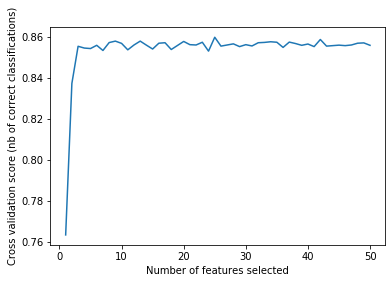

In [205]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_[:50])+1), rfecv.grid_scores_[:50])
plt.show()

In [46]:
rfecv.grid_scores_

array([0.76336426, 0.83728212, 0.85538609, 0.85452113, 0.85428457,
       0.85585888, 0.85333947, 0.8571973 , 0.85790578, 0.85680388,
       0.85365514, 0.8560167 , 0.85790556, 0.85593755, 0.85404934,
       0.85688225, 0.85711831, 0.85381237, 0.85578017, 0.85774827,
       0.85617393, 0.85601716, 0.85735466, 0.8530251 , 0.85979548,
       0.85546558, 0.8560167 , 0.85656741, 0.85522945, 0.85617439,
       0.85554419, 0.85711859, 0.85727641, 0.85759085, 0.85735469,
       0.85483597, 0.85743374, 0.8567252 , 0.85585949, 0.85648904,
       0.8552292 , 0.85869324, 0.8554661 , 0.85570158, 0.85593814,
       0.85570167, 0.8560167 , 0.85688281, 0.85704004, 0.85585937,
       0.85515099, 0.86018816, 0.85790593, 0.85507231, 0.85798439,
       0.85538681, 0.85869349, 0.8567252 , 0.85609599, 0.85641049,
       0.85459965, 0.85727626, 0.85641009, 0.85593802, 0.85672514,
       0.85601654, 0.85522945, 0.85680382, 0.85806341, 0.85475757,
       0.85633169, 0.85404838, 0.8550725 , 0.85735463, 0.85900

In [47]:
rfecv.n_features_

968

In [48]:
X_new = rfecv.transform(X)

In [50]:
X_new.shape

(12703, 968)

In [51]:
X.shape

(12703, 1613)

In [54]:
model.train(X_new, y)

INFO:model_training:Accuracy
0.8580633515851842
INFO:model_training:Precision (Unsynthesisable)
0.8951677774409212
INFO:model_training:Recall (Unsynthesisable)
0.9420307903389284
INFO:model_training:Precision (Synthesisable)
0.567210612356561
INFO:model_training:Recall (Synthesisable)
0.42427184466019413


In [162]:
model.train(X, y)

INFO:model_training:Accuracy
0.855465608121299
INFO:model_training:Precision (Unsynthesisable)
0.892711389325901
INFO:model_training:Recall (Unsynthesisable)
0.9418430852848421
INFO:model_training:Precision (Synthesisable)
0.5597878742582555
INFO:model_training:Recall (Synthesisable)
0.4092233009708738


In [199]:
from sklearn.feature_selection import VarianceThreshold

In [200]:
sel = VarianceThreshold(threshold=(.8 * (1-.8)))
sel.fit(X)
X_trans = sel.transform(X)

In [201]:
X_trans.shape

(12703, 912)

In [198]:
model.train(X, y)

INFO:model_training:Accuracy
0.8586929629664061
INFO:model_training:Precision (Unsynthesisable)
0.8965003754367895
INFO:model_training:Recall (Unsynthesisable)
0.9411853229833627
INFO:model_training:Precision (Synthesisable)
0.5733422071049705
INFO:model_training:Recall (Synthesisable)
0.4325242718446602


In [70]:
sel.get_params()

{'threshold': 0.15999999999999998}

In [92]:
from sklearn.feature_selection import SelectFromModel

In [191]:
mdl = SelectFromModel(model.model, threshold=-np.inf, prefit=False, max_features=5)

In [192]:
mdl.fit(X, y)
n_features = mdl.transform(X).shape[1]
# while n_features > 2:
#     mdl.threshold += 0.1
#     X_transform = mdl.transform(X)
#     n_features = X_transform.shape[1]
#     print(n_features)

In [193]:
X_transform = mdl.transform(X)

In [194]:
X_transform.shape

(12703, 5)

In [197]:
model.train(X_transform, y)

INFO:model_training:Accuracy
0.8339769202403419
INFO:model_training:Precision (Unsynthesisable)
0.8949687930254868
INFO:model_training:Recall (Unsynthesisable)
0.9098999406689575
INFO:model_training:Precision (Synthesisable)
0.4791120518465982
INFO:model_training:Recall (Synthesisable)
0.441747572815534


In [196]:
for feature_list_index in mdl.get_support(indices=True):
    print(features.iloc[:, feature_list_index].name)

AETA_dBeta
IC2
SIC2
BIC3
CIC5
